In [2]:

import pandas as pd  # Import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# After mounting, you can access files in your Drive like this:
data = pd.read_csv('/content/drive/MyDrive/traffic_accidents.csv')
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
               crash_date traffic_control_device weather_condition  \
0  07/29/2023 01:00:00 PM         TRAFFIC SIGNAL             CLEAR   
1  08/13/2023 12:11:00 AM         TRAFFIC SIGNAL             CLEAR   
2  12/09/2021 10:30:00 AM         TRAFFIC SIGNAL             CLEAR   
3  08/09/2023 07:55:00 PM         TRAFFIC SIGNAL             CLEAR   
4  08/19/2023 02:55:00 PM         TRAFFIC SIGNAL             CLEAR   

       lighting_condition first_crash_type trafficway_type  \
0                DAYLIGHT          TURNING     NOT DIVIDED   
1  DARKNESS, LIGHTED ROAD          TURNING        FOUR WAY   
2                DAYLIGHT         REAR END  T-INTERSECTION   
3                DAYLIGHT            ANGLE        FOUR WAY   
4                DAYLIGHT         REAR END  T-INTERSECTION   

            alignment roadway_surface_cond road_defect  \
0  STRAIGHT AND LEV

In [7]:
import pandas as pd
df = pd.read_csv('traffic_accidents.csv')
df.head(10)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
5,09/06/2023 12:59:00 AM,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,2.0,0.0,0.0,2.0,0.0,0.0,0,4,9
6,12/20/2022 11:45:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR TO FRONT,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,11,3,12
7,09/20/2023 02:38:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),"CURVE, LEVEL",DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,14,4,9
8,06/04/2018 06:42:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,18,2,6
9,09/07/2023 05:30:00 PM,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,4.0,17,5,9


In [ ]:


# Setting seaborn style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('traffic_accidents.csv')

# Display basic information
print("Dataset Info:\n")
print(df.info())
print("\nFirst 5 rows:\n")
print(df.head())

# Check for missing values
print("\nMissing values:\n")
print(df.isnull().sum())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributo

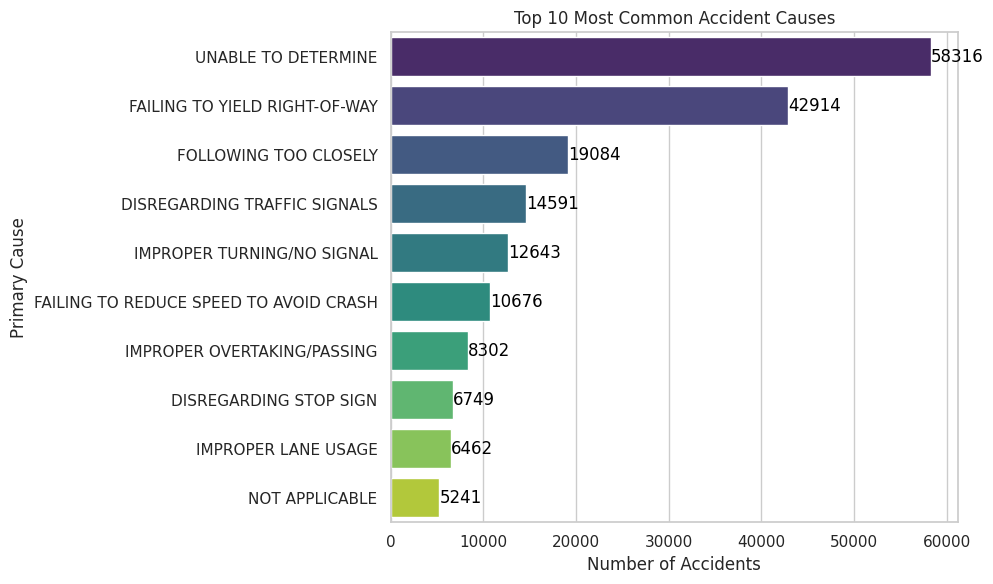

In [ ]:
# Objective 1: Most Common Accident Cause

cause_counts = df['prim_contributory_cause'].value_counts().head(10)
sns.barplot(x=cause_counts.values, y=cause_counts.index, hue=cause_counts.index, dodge=False, palette='viridis', legend=False)

plt.title('Top 10 Most Common Accident Causes')
plt.xlabel('Number of Accidents')
plt.ylabel('Primary Cause')
for i, v in enumerate(cause_counts.values):
    plt.text(v + 10, i, str(v), color='black', va='center')
plt.tight_layout()
plt.show()

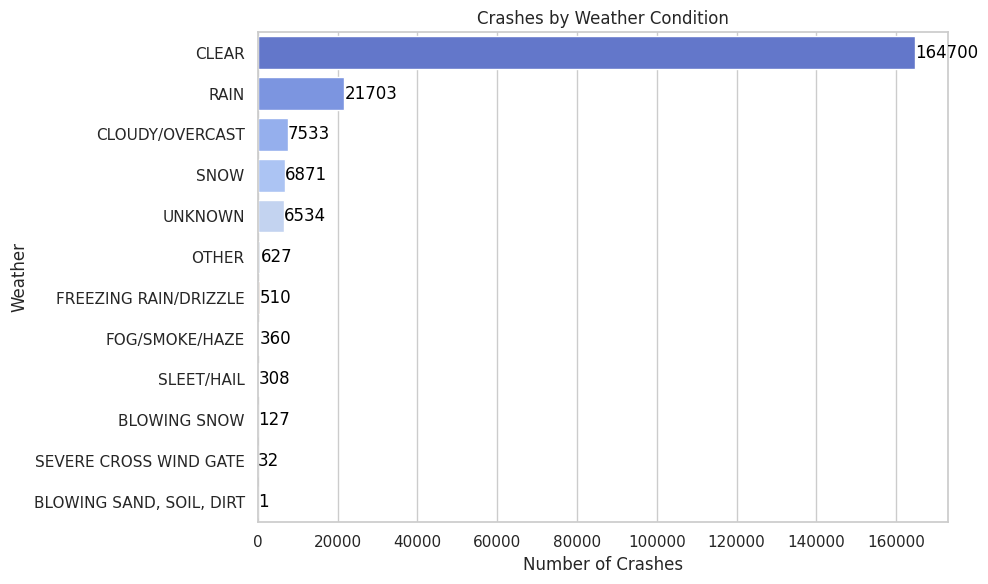

In [ ]:
# Objective 2: Crashes in Different Weather

weather_crashes = df['weather_condition'].value_counts()
sns.barplot(x=weather_crashes.values, y=weather_crashes.index, hue=weather_crashes.index, dodge=False, palette='coolwarm', legend=False)

plt.title('Crashes by Weather Condition')
plt.xlabel('Number of Crashes')
plt.ylabel('Weather')
for i, v in enumerate(weather_crashes.values):
    plt.text(v + 10, i, str(v), color='black', va='center')
plt.tight_layout()
plt.show()

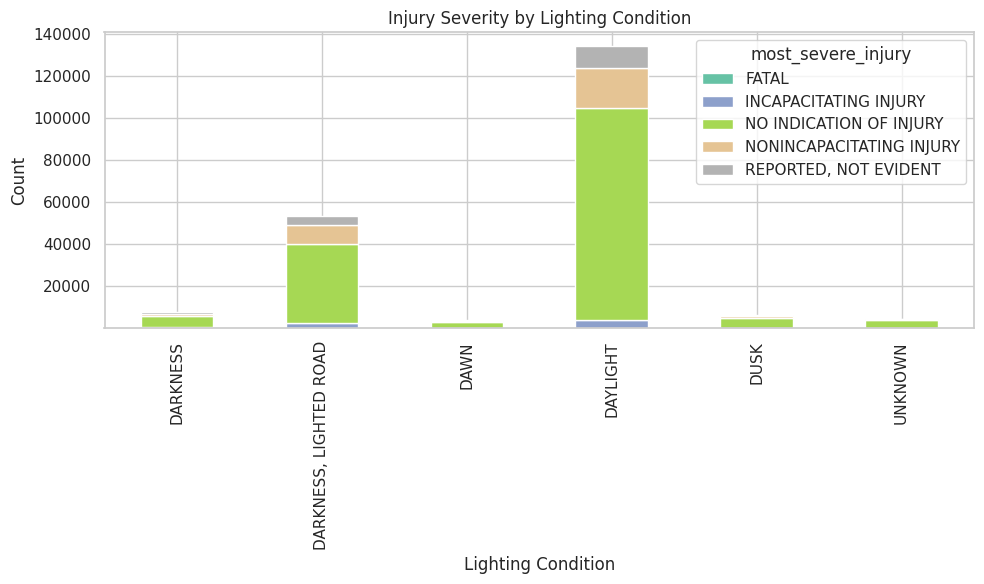

In [ ]:
# Objective 3: Injuries by Lighting Condition

injury_lighting = df.groupby('lighting_condition')['most_severe_injury'].value_counts().unstack().fillna(0)
injury_lighting.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Injury Severity by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

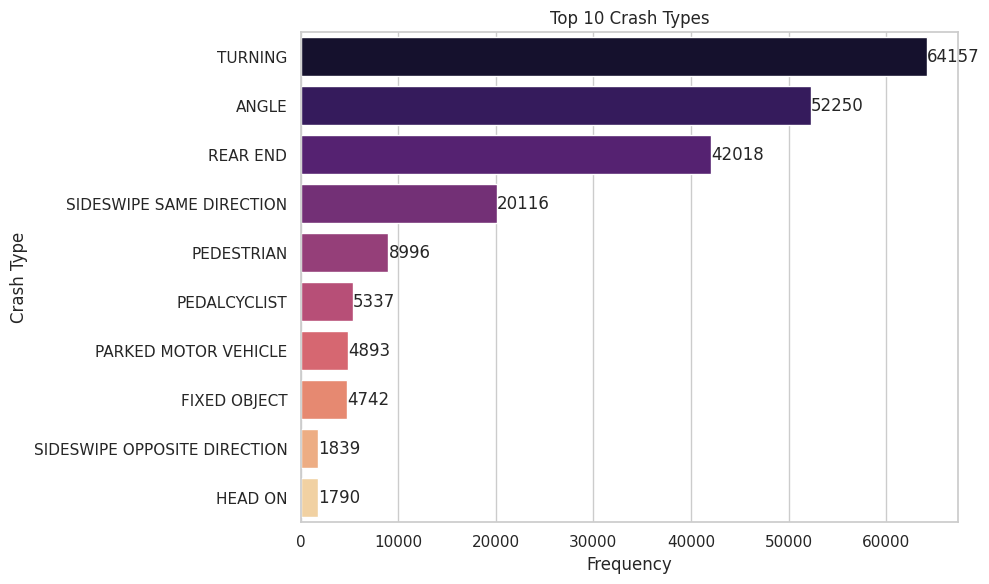

In [ ]:
# Objective 4: Crash Type Frequency (Top 10 crash types)
crash_type_counts = df['first_crash_type'].value_counts().head(10)

sns.barplot(
    x=crash_type_counts.values,
    y=crash_type_counts.index,
    hue=crash_type_counts.index,
    dodge=False,
    palette='magma',
    legend=False
)
plt.title('Top 10 Crash Types')
plt.xlabel('Frequency')
plt.ylabel('Crash Type')

# Add value labels
for i, v in enumerate(crash_type_counts.values):
    plt.text(v + 10, i, str(v), va='center')

plt.tight_layout()
plt.show()

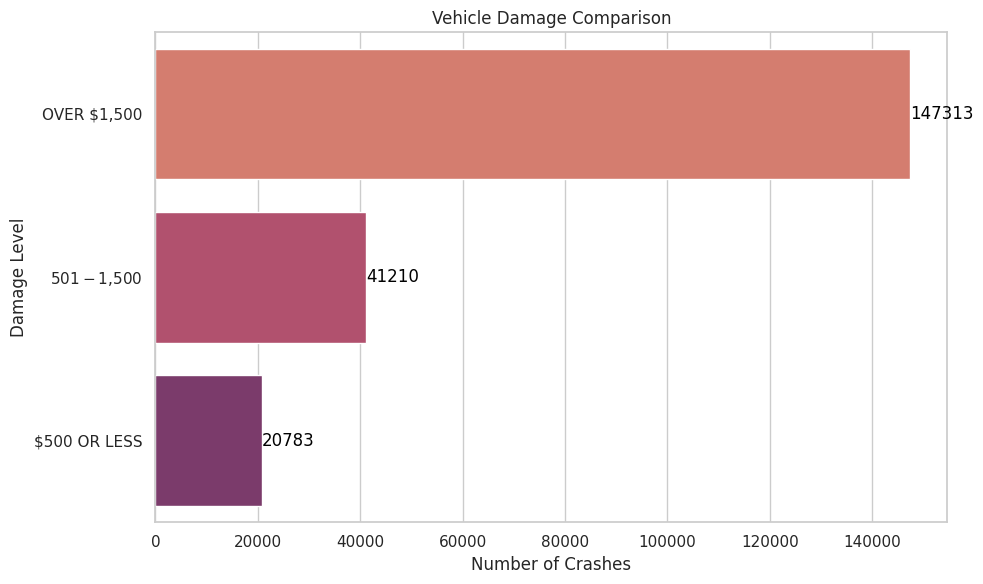

In [ ]:
# Objective 5: Damage Comparison

damage_counts = df['damage'].value_counts()
sns.barplot(x=damage_counts.values, y=damage_counts.index, hue=damage_counts.index, palette='flare', dodge=False, legend=False)

plt.title('Vehicle Damage Comparison')
plt.xlabel('Number of Crashes')
plt.ylabel('Damage Level')

for i, v in enumerate(damage_counts.values):
    plt.text(v + 10, i, str(v), color='black', va='center')
plt.tight_layout()
plt.show()

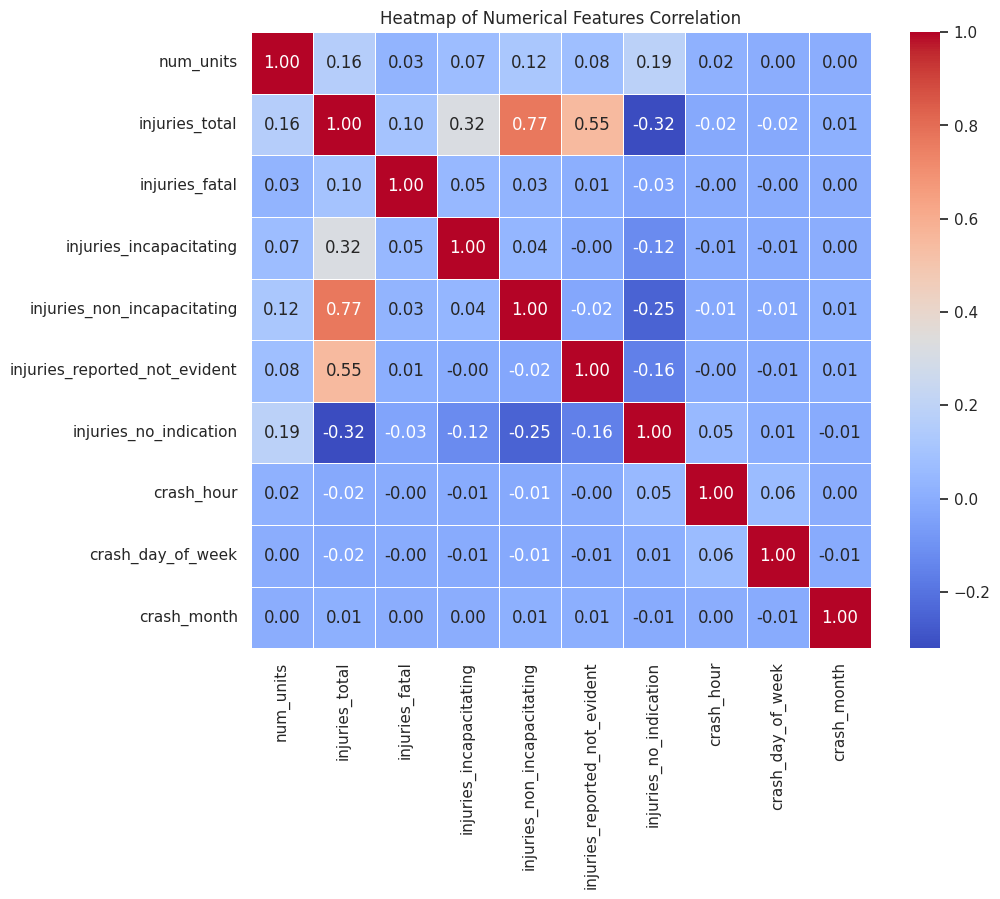

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the figure size and plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Numerical Features Correlation")
plt.show()

In [ ]:
# Map original injury types into 4 categories
injury_mapping = {
    'NO APPARENT INJURY': 'No Injury',
    'NONINCAPACITATING INJURY': 'Minor Injury',
    'REPORTED, NOT EVIDENT': 'Minor Injury',
    'INCAPACITATING INJURY': 'Major Injury',
    'FATAL': 'Fatal'
}

df['injury_grouped'] = df['most_severe_injury'].map(injury_mapping)

# Drop rows that didn’t match mapping (if any)
df = df.dropna(subset=['injury_grouped'])

print(df['injury_grouped'].value_counts())


injury_grouped
Minor Injury    47602
Major Injury     6564
Fatal             351
Name: count, dtype: int64


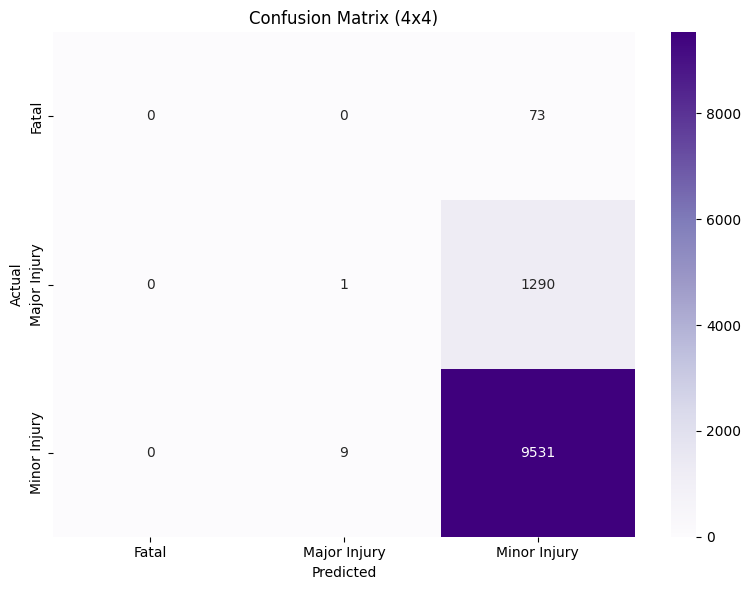

In [21]:
# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(df['injury_grouped'])

X_encoded = pd.get_dummies(df[features])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (4x4)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



In [9]:
# Injury mapping to 4 categories
injury_mapping = {
    'NO APPARENT INJURY': 'No Injury',
    'NONINCAPACITATING INJURY': 'Minor Injury',
    'REPORTED, NOT EVIDENT': 'Minor Injury',
    'INCAPACITATING INJURY': 'Major Injury',
    'FATAL': 'Fatal'
}

df['injury_grouped'] = df['most_severe_injury'].map(injury_mapping)
df = df.dropna(subset=['injury_grouped', 'prim_contributory_cause', 'weather_condition', 'lighting_condition'])

# Features and Target
features = ['prim_contributory_cause', 'weather_condition', 'lighting_condition']
X = pd.get_dummies(df[features])
le = LabelEncoder()
y = le.fit_transform(df['injury_grouped'])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
def injury_level(val):
    if val in ['INCAPACITATING INJURY', 'FATAL']:
        return 'Severe'
    else:
        return 'Non-Severe'

df['injury_binary'] = df['most_severe_injury'].map(injury_level)

df = df.dropna(subset=['injury_binary', 'prim_contributory_cause', 'weather_condition', 'lighting_condition'])

features = ['prim_contributory_cause', 'weather_condition', 'lighting_condition']
X = pd.get_dummies(df[features])
le = LabelEncoder()
y = le.fit_transform(df['injury_binary'])  # 0 = Non-Severe, 1 = Severe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr) * 100)
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

# Decision Tree
dt = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=3)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt) * 100)
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=7, class_weight='balanced', random_state=2)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf) * 100)
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn) * 100)
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))


Logistic Regression Accuracy: 57.4101247248716
              precision    recall  f1-score   support

  Non-Severe       0.89      0.59      0.71      9540
      Severe       0.14      0.48      0.22      1364

    accuracy                           0.57     10904
   macro avg       0.52      0.53      0.46     10904
weighted avg       0.79      0.57      0.65     10904

Decision Tree Accuracy: 43.846294937637566
              precision    recall  f1-score   support

  Non-Severe       0.89      0.41      0.56      9540
      Severe       0.14      0.66      0.23      1364

    accuracy                           0.44     10904
   macro avg       0.51      0.53      0.39     10904
weighted avg       0.80      0.44      0.52     10904

Random Forest Accuracy: 58.602347762289064
              precision    recall  f1-score   support

  Non-Severe       0.88      0.61      0.72      9540
      Severe       0.14      0.45      0.21      1364

    accuracy                           0.59     1

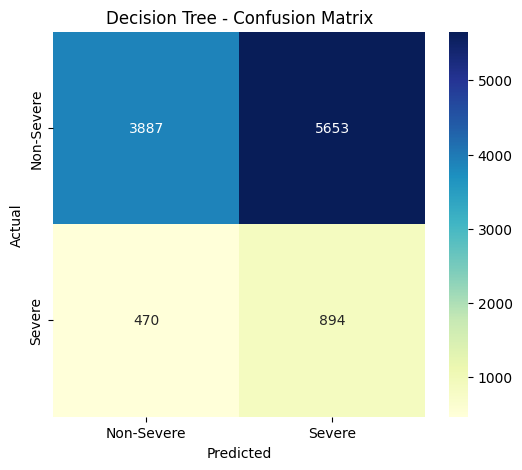

In [13]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()


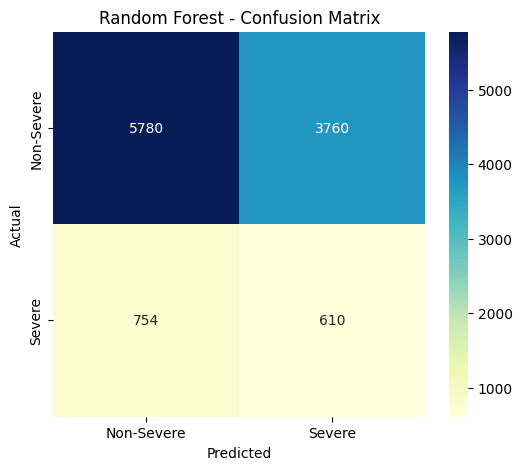

In [14]:
# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()


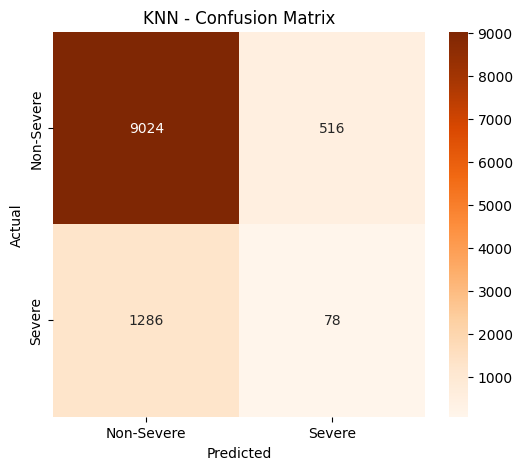

In [15]:
# Generate the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges',xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN - Confusion Matrix')
plt.show()



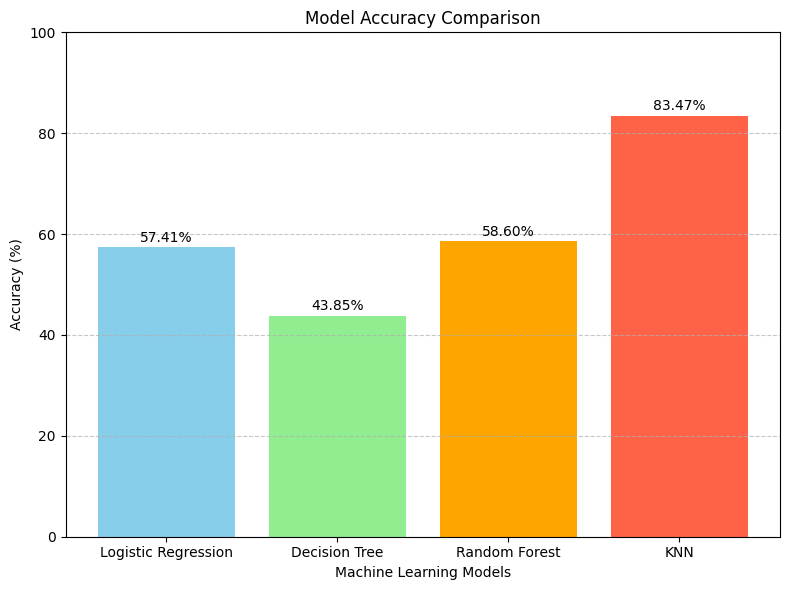

In [19]:

acc_lr = accuracy_score(y_test, y_pred_lr) * 100
acc_dt = accuracy_score(y_test, y_pred_dt) * 100
acc_rf = accuracy_score(y_test, y_pred_rf) * 100
acc_knn = accuracy_score(y_test, y_pred_knn) * 100

# Model names and their accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']
accuracies = [acc_lr, acc_dt, acc_rf, acc_knn]

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'orange', 'tomato'])

# Add text labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

plt.ylim(0, 100)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xlabel('Machine Learning Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
